## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares,minimize
from scipy.integrate import simpson

## Constants

In [2]:
NA = 6.02214076E23  # Avogadro's number
Ntrue = 188 #Number of ions used
k = 1.0457  # units: kJ/mol/nm^2 - force constant being used in calculations
R = 8.31446261815324  # units: J/(mol*K) - ideal gas constant
T = 300  # units: K - temperature used for calculations
L_x, L_y, L_z = 4.8, 4.8, 14.4

## Extra info

In [3]:
# # Alirezza SI nm-based answers
# print(1.9247 / (conversion_factor ** (-0.5)))
# print(9.3393E-2 / (conversion_factor ** (-1)))
# print(3.4572E-2 / (conversion_factor **(-2)))

## Plotting initial concentration profiles

In [4]:
def compute_c_profile(xvg_file):
    """
    Computes a concentration profile from an XVG file by averaging symmetric parts of the profile.

    Parameters
    ----------
    xvg_file : str
        The path to the XVG file containing the number density data.
    
    Returns
    -------
    z_coords : numpy.ndarray
        The z-coordinates of the concentration profile.
    c_profile : numpy.ndarray
        The symmetric concentration profile.
    """
    z_coords, rho = np.loadtxt(xvg_file, comments=["@", "#"], unpack=True)
    # rho = rho / NA * 1E27 / 1000  # number density in mol/L

    mid_idx = int(len(rho) / 2 - 1)
    c_profile = 0.5 * (rho[:mid_idx + 1][::-1] + rho[mid_idx:-1])  # in mol/L
    z_coords = z_coords[:mid_idx + 1]  # in nm

    return z_coords, c_profile


In [5]:
z, c_original = compute_c_profile("density_hw_original_288.xvg")
z, c_1 = compute_c_profile("density_hw_r1_288.xvg")  # replicate 1
z, c_2 = compute_c_profile("density_hw_r2_288.xvg")  # replicate 2
z, c_3 = compute_c_profile("density_hw_r3_288.xvg")  # replicate 3


In [6]:
# List concentration profiles
concentration_profiles = np.array([c_original,c_1,c_2,c_3])

### Normalizing Densities

Note from Dr Shirts: It is more rigorous to normalize the densities, since we know what the total number must be. 

Eq 13: $$ L_{x} L_{y} \int^{L_{z}/2}_{-L_{z}/2} C_{s}(z) dz = N_{s}$$

In [7]:
# Estimate the total number of ions, N_s (using Equation 13)

for c in concentration_profiles:
    N_s = L_x * L_y * simpson(c, z)
    print(N_s)  # this should compare to number of ions used (3m used 188)
    c /= (N_s/Ntrue)
    
# verify normalization worked.
for c in concentration_profiles:
    N_s = L_x * L_y * simpson(c, z)
    print(N_s)  # compare to number of ions used (3m used 188)
    

188.00496817343995
188.18428364160002
187.98510751343997
188.10112932479998
188.00000000000006
187.99999999999997
188.00000000000006
188.00000000000006


/tmp/ipykernel_384697/2326853868.py:4: DeprecationWarning: You are passing x=[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975 1.025 1.075 1.125 1.175
 1.225 1.275 1.325 1.375 1.425 1.475 1.525 1.575 1.625 1.675 1.725 1.775
 1.825 1.875 1.925 1.975 2.025 2.075 2.125 2.175 2.225 2.275 2.325 2.375
 2.425 2.475 2.525 2.575 2.625 2.675 2.725 2.775 2.825 2.875 2.925 2.975
 3.025 3.075 3.125 3.175 3.225 3.275 3.325 3.375 3.425 3.475 3.525 3.575
 3.625 3.675 3.725 3.775 3.825 3.875 3.925 3.975 4.025 4.075 4.125 4.175
 4.225 4.275 4.325 4.375 4.425 4.475 4.525 4.575 4.625 4.675 4.725 4.775
 4.825 4.875 4.925 4.975 5.025 5.075 5.125 5.175 5.225 5.275 5.325 5.375
 5.425 5.475 5.525 5.575 5.625 5.675 5.725 5.775 5.825 5.875 5.925 5.975
 6.025 6.075 6.125 6.175 6.225 6.275 6.325 6.375 6.425 6.475 6.525 6.575
 6.625 6.675 6.725 6.775 6.825 6.875 6.925 6.975 7.025 7.075 7.125 7.175] as a positional argument. Please change your i

Note BM: could maybe code up a funciton to check the above ^

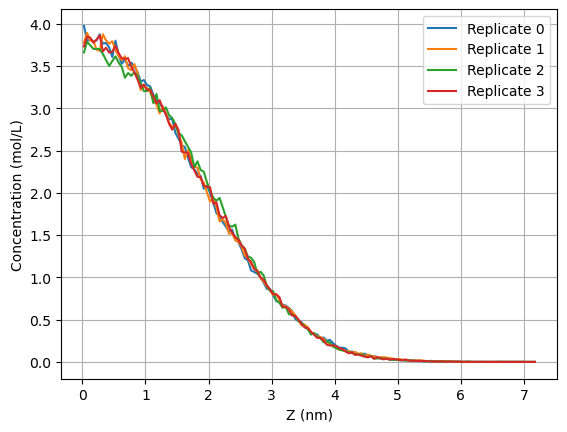

In [8]:
# Plot the concentration profiles (original and replicates)
plt.figure()
for i, c in enumerate(concentration_profiles):
    plt.plot(z, c, label="Replicate "+str(i))
plt.xlabel("Z (nm)")
plt.ylabel("Concentration (mol/L)")
plt.grid()
plt.legend()
plt.show()

## Bootstrapping concentration profiles

In [9]:
# # Function to perform bootstrapping
# def bootstrap_profiles(profiles, n_samples):
#     bootstrap_means = []
#     n_profiles = len(profiles)
#     for _ in range(n_samples):
#         # Resample with replacement
#         bootstrap_sample = [profiles[np.random.randint(0, n_profiles)] for _ in range(n_profiles)]
#         # Calculate mean profile
#         mean_profile = np.mean(bootstrap_sample, axis=0)
#         bootstrap_means.append(mean_profile)
#     return np.array(bootstrap_means)


In [10]:
# # Number of bootstrap samples
# n_bootstrap = 1000

# # Perform bootstrapping
# bootstrap_means = bootstrap_profiles(concentration_profiles, n_bootstrap)

# # Calculate the mean and 95% confidence intervals for each point
# #mean_profile = np.mean(bootstrap_means, axis=0)

# #Use the direct average rather than over bootstrap means
# mean_profile = np.mean(concentration_profiles,axis=0)
# lower_bound = np.percentile(bootstrap_means, 2.5, axis=0)
# upper_bound = np.percentile(bootstrap_means, 97.5, axis=0)

# c_0 = mean_profile
# # Plotting the results
# conc_points = range(len(c_0))
# plt.plot(conc_points, c_0, label='Mean Profile')
# plt.fill_between(conc_points, lower_bound, upper_bound, color='b', alpha=0.2, label='95% Confidence Interval')
# plt.xlabel('Concentration Points')
# plt.ylabel('Concentration')
# plt.legend()
# plt.title('Bootstrapped Concentration Profiles')
# plt.show()

In [11]:
# # Plotting the log of concentration profiles
# plt.plot(z, np.log(c_0), label='Mean Profile')
# plt.xlabel('Z (nm)')
# plt.ylabel('log M(mol/L)')
# plt.legend()
# plt.title('Bootstrapped Concentration Profile')
# plt.show()

## Calculating eq 12

$$ ln \left[ \frac{C_{s}(z)}{C_{max}} \right] + A \left[ \frac{C_{max}^{1/2}}{1+BC_{max}^{1/2}} - \frac{C_{s}(z)^{1/2}}{1+BC_{s}(z)^{1/2}} \right] + \sum^{i_{max}}_{i=1} \alpha_{i} [C_{s}(z)^{i} - C_{max}^{i}] = - \frac {U(z)}{RT}$$

In [12]:
def calc_y(theta, x):
    """
    Calculates -U(z) / RT using Equation 12.

    Parameters
    ----------
    theta : list
        A list containing the three parameters to be fit, including B, alpha_1, alpha_2.
    x : concentration list
    """
    A = 1.7964  # in M^(-1/2), value according to the SI

    # Converting the units for A so that they are nm-based
    conversion_factor = 1E24 / NA  # 1 nm^(-3) ~= 1.6605 M
    A /= (conversion_factor ** 0.5)

    C_max = np.max(x)
    term_1 = np.log(x / C_max)
    term_2 = -A * np.sqrt(x) / (1 + theta[0] * np.sqrt(x))
    term_3 = A * np.sqrt(C_max) / (1 + theta[0] * np.sqrt(C_max))
    term_4 = theta[1]* (x - C_max) 
    term_5 = theta[2] * (x ** 2 - C_max ** 2)
    y = term_1 + term_2 + term_3 + term_4 + term_5

    return y

def residuals(theta, x, y):
    return np.power(calc_y(theta, x) - y, 2)

In [13]:
#Use the direct average rather than over bootstrap means
mean_profile = np.mean(concentration_profiles,axis=0)
c_0 = mean_profile

# Removing 0 values from the concentration profile, and the corresponding z values
z_fit = z[c_0 != 0]
c_fit = c_0[c_0 != 0]

In [14]:
A = 1.7964  # in M^(-1/2), value according to the SI

# Converting the units for A so that they are nm-based
conversion_factor = 1E24 / NA  # 1 nm^(-3) ~= 1.6605 M
A /= (conversion_factor ** 0.5)

In [15]:
# Right side/ y of equation 12
y_values = -(0.5 * k * z_fit ** 2) * 1000 / (R * T) 

#Getting fit for full left side of eq 12
result_unweighted = least_squares(residuals, [4, 0.2, 0], args=(c_fit, y_values))

## Plotting unweighted results

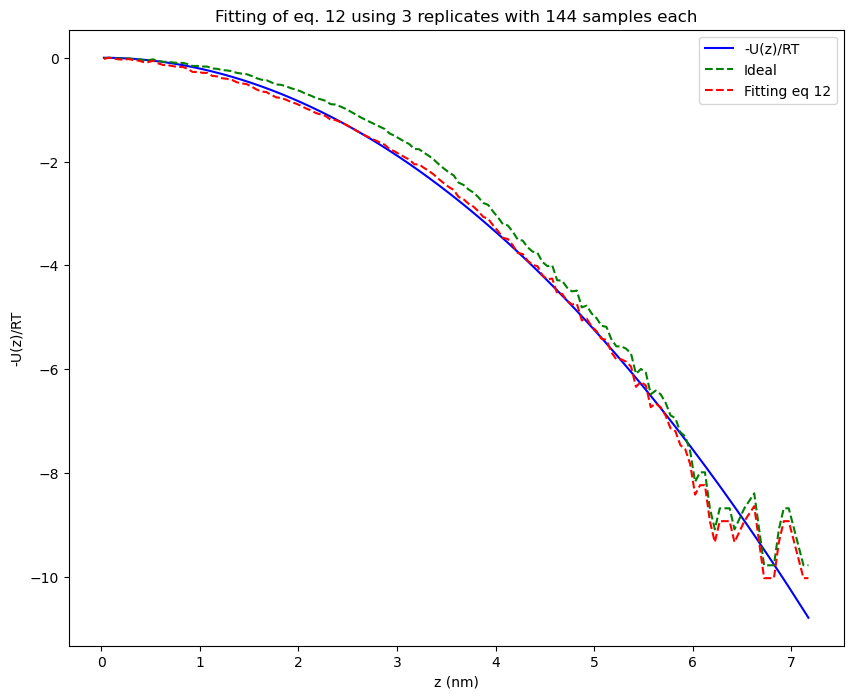

In [16]:
# plot the unweighted results
plt.figure(figsize = (10,8))
plt.plot(z_fit, y_values, 'b', label="-U(z)/RT")
plt.plot(z_fit, np.log(c_fit/np.max(c_fit)), 'g--', label="Ideal")
plt.plot(z_fit, calc_y(result_unweighted.x,c_fit), 'r--', label="Fitting eq 12")
plt.xlabel('z (nm)')
plt.ylabel('-U(z)/RT')
plt.title('Fitting of eq. 12 using 3 replicates with 144 samples each')
plt.legend()
plt.show()

We do see reasonably good fit - the idea curve (green line) is corrected to the be closer to the blue (red line is closer tothe blue line). However, we would also like to not fit the noise at the end. 

To do this, we do some error propagation to find the ideal weights for the least square fit. $C(z)/C_{max}$ is a probability, or at least proportional to a probability.  The uncertainty in a probability estimate $\hat{p}$ from a histogram (whose value with infinitely collected points would be $p$), can be shown to be $\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$, where $\hat{p}$ is the measured probability in that histogram bin, and $n$ is the total number of points collected over all bins.  But we are interested in the error of $\ln \hat{p}$. Generally the error in function $f$ of random variable $x$ $\delta f(x)$ is equal to $|f'(x)| \delta x$. So $\delta (\ln p) = \frac{\delta p}{p} = \sqrt{\frac{\hat{p}(1-\hat{p})}{n\hat{p}^2}}$.

For weighted least squares, it can be show that the weights should be proportional to 1/variance of the data point. The variance will be $(\delta\ln p)^2 = \frac{\hat{p}(1-\hat{p})}{n\hat{p}^2} = \frac{1-\hat{p}}{np}$.  The weights are only defined up to a constant, so we can just use $\frac{1-p}{p}$.  To do this, we have to normalize $C/C_{max}$, which is easy to do, we call it K. So the weights should be proportional to $\frac{C/K}{1-C/K} = \frac{C}{K-C}$.  So the most well defined points will get the most probability, the noisiest points the least.

## Find weights for least square fit

In [17]:
norm = N_s/(L_x*L_y)
print(norm)

8.159722222222225


In [18]:
def weighted_residuals(theta, x, y):
    return (x/(norm-x))*np.power(calc_y(theta, x) - y, 2)

In [19]:
#Getting fit for full left side of eq 12
result_weighted = least_squares(weighted_residuals, [4, 0.2,-0.01], args=(c_fit, y_values))

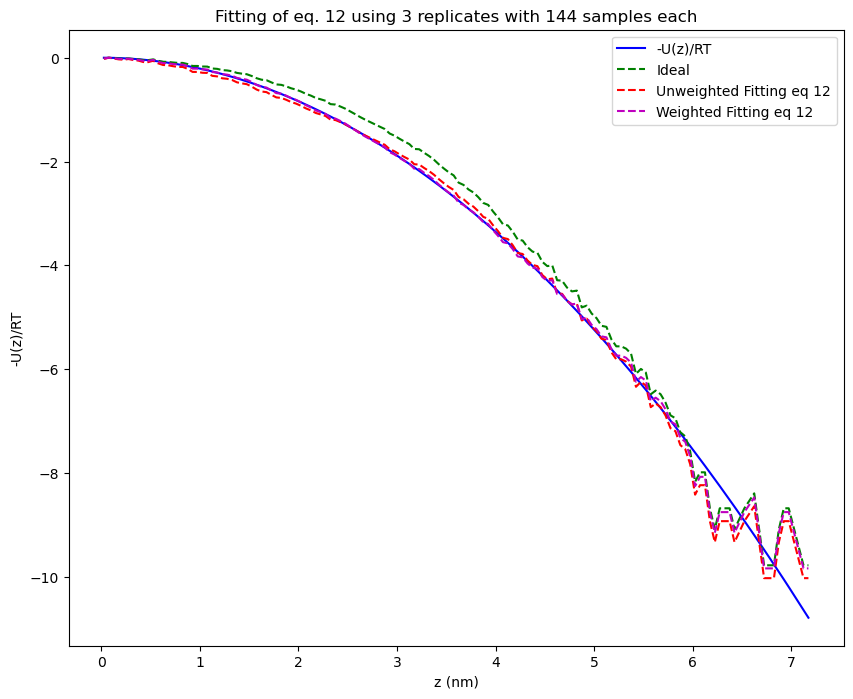

In [20]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(z_fit, y_values, 'b', label="-U(z)/RT")
plt.plot(z_fit, np.log(c_fit/np.max(c_fit)), 'g--', label="Ideal")
plt.plot(z_fit, calc_y(result_unweighted.x,c_fit), 'r--', label="Unweighted Fitting eq 12")
plt.plot(z_fit, calc_y(result_weighted.x,c_fit), 'm--', label="Weighted Fitting eq 12")
plt.xlabel('z (nm)')
plt.ylabel('-U(z)/RT')
plt.title('Fitting of eq. 12 using 3 replicates with 144 samples each')
plt.legend()
plt.show()

Hard to see what is going on, so let's look at differences

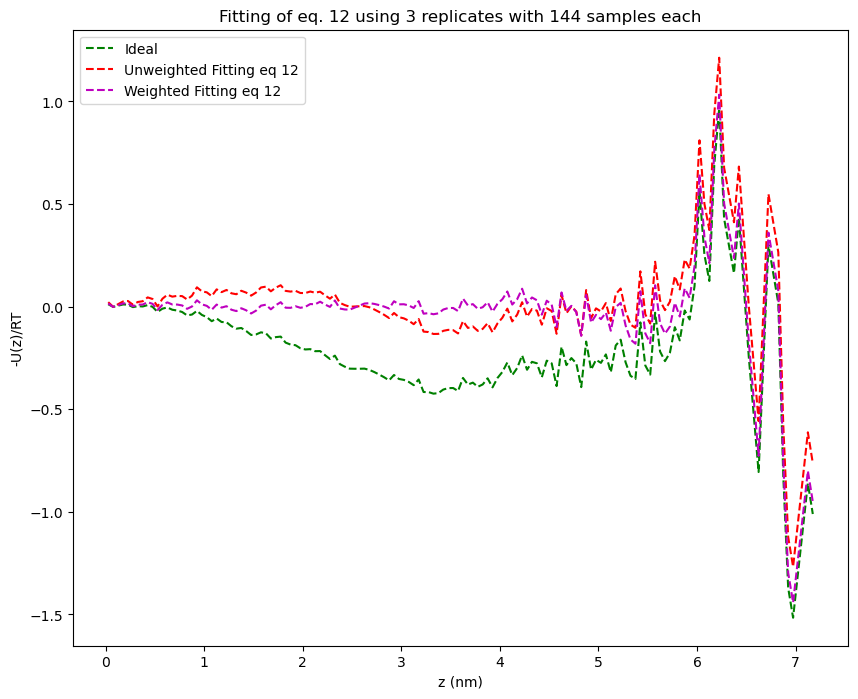

In [21]:
# plot the results. Notice the plots are now being subtracted from the y_values results
plt.figure(figsize = (10,8))
plt.plot(z_fit, y_values-np.log(c_fit/np.max(c_fit)), 'g--', label="Ideal")
plt.plot(z_fit, y_values-calc_y(result_unweighted.x,c_fit), 'r--', label="Unweighted Fitting eq 12")
plt.plot(z_fit, y_values-calc_y(result_weighted.x,c_fit), 'm--', label="Weighted Fitting eq 12")
plt.xlabel('z (nm)')
plt.ylabel('-U(z)/RT')
plt.title('Fitting of eq. 12 using 3 replicates with 144 samples each')
plt.legend()
plt.show()

The weighted fitting is much closer to zero over the range with reasonable concentrations, say z=5.

In [22]:
zlim = 4 #coordinate limit for where fitting is closer

In [23]:
#Stdev of unweighted results
np.std(y_values[z_fit<zlim]-calc_y(result_unweighted.x,c_fit[z_fit<zlim]))

0.07165057321394126

In [24]:
#Stdev of weighted results
np.std(y_values[z_fit<zlim]-calc_y(result_weighted.x,c_fit[z_fit<zlim]))

0.01619525243476018

Compare the distribution of the parameters with the fit!

In [25]:
print("B =", result_unweighted.x[0])
print("alpha1 =", result_unweighted.x[1])
print("alpha2 =", result_unweighted.x[2])

B = 6377.934608313355
alpha1 = -0.09873001271302291
alpha2 = 0.04266888931970931


In [26]:
print("B =", result_weighted.x[0])
print("alpha1 =", result_weighted.x[1])
print("alpha2 =", result_weighted.x[2])

B = 1.4400574685965792
alpha1 = 0.28892556980813666
alpha2 = -0.024018621321095092


And we expect that the parameters will be more consistent between runs with weighting.

## Bootstrapping Profiles (without and with weights)

In [27]:
trialp = [4, 0.1,0.0]

In [28]:
# Function to perform bootstrapping
def bootstrap_profiles(profiles, n_samples, res_func):
    bootstrap_params = []
    n_profiles = len(profiles)
    for _ in range(n_samples):
        # Resample with replacement
        bootstrap_sample = [profiles[np.random.randint(0, n_profiles)] for _ in range(n_profiles)]
        # Calculate mean profile
        mean_profile = np.mean(bootstrap_sample, axis=0)
        z_fit = z[mean_profile != 0]
        c_fit = mean_profile[mean_profile != 0] 
        y_values = -(0.5 * k * z_fit ** 2) * 1000 / (R * T)
        result = least_squares(res_func, trialp, args=(c_fit, y_values))
        bootstrap_params.append(result.x)
        
    return np.array(bootstrap_params) # list

Param 0 = 1342.8168968479993 +/- 4334.375576691896


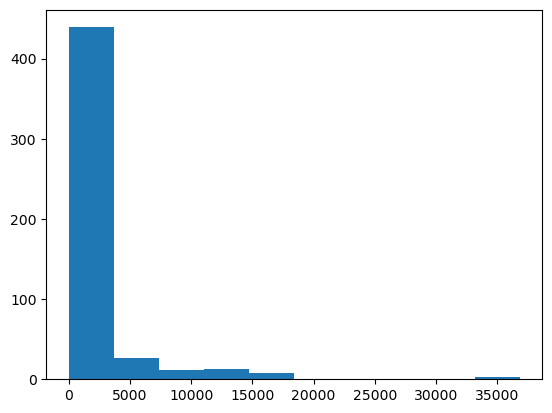

Param 1 = 0.4201397278805658 +/- 0.3732790641532457


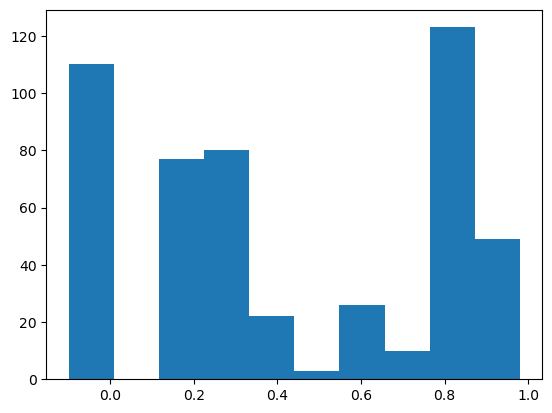

Param 2 = -0.028859538511130694 +/- 0.044046297982434854


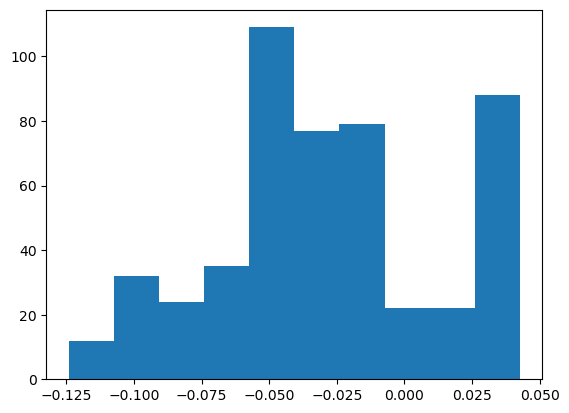

In [31]:
# Perform bootstrapping with unweighted fit
bootstrap_params_unweighted = bootstrap_profiles(profiles=concentration_profiles, n_samples=500, res_func=residuals)

for i in range(len(trialp)):
    pd = bootstrap_params_unweighted[:,i]
    std_param = np.std(pd) 
    mean_param = np.mean(pd)  # it's actually more accurate to
                             # just use the single fits, but we don't 
                             # necessarily know the name of that results structure
                             # when we are at this point in the code, use the mean for now
    print(f"Param {i} = {mean_param} +/- {std_param}")
    plt.hist(pd)
    plt.show()

Param 0 = 1.3903857399921045 +/- 0.663243890308654


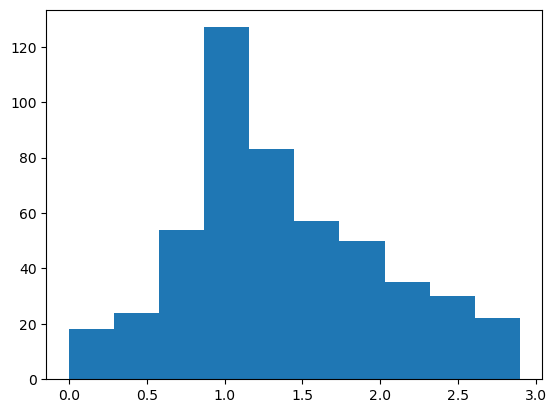

Param 1 = 0.3510402965414593 +/- 0.1313763518970828


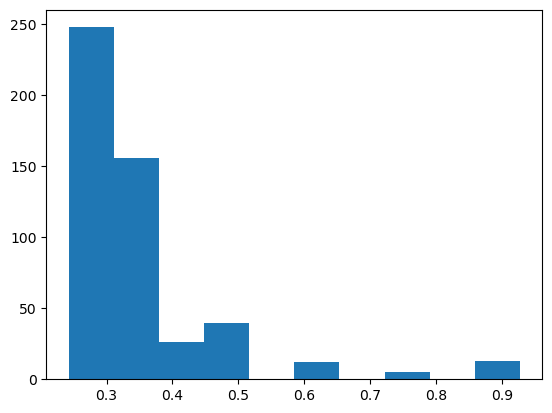

Param 2 = -0.03117079973349112 +/- 0.010010142177085044


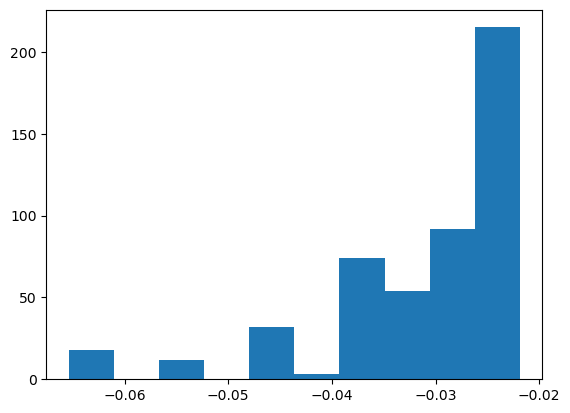

In [32]:
# Perform bootstrapping with weighted residuals
n_bootstrap = 500
bootstrap_params_weighted  = bootstrap_profiles(profiles=concentration_profiles, n_samples=500, res_func=weighted_residuals)

for i in range(len(trialp)):
    pd = bootstrap_params_weighted[:,i]
    std_param = np.std(pd) 
    mean_param = np.mean(pd)  # it's actually more accurate to
                             # just use the single fits, but we don't 
                             # necessarily know the name of that results structure
                             # when we are at this point in the code, use the mean for now
    print(f"Param {i} = {mean_param} +/- {std_param}")
    plt.hist(pd)
    plt.show()

Much more consistent performance!

## Maximum Likelihood Parameter Optimization

Now, we try maximum likelihood parameter optimization.  The basic idea is to express the probability of parameters given the data, $P(a|x)$, and using Bayes' rule to find that 

$P(a|x) = \frac{P(x|a)P(a)}{P(x)}$

We want to find the parameters 
$P(x)$ does not depend on the parameters. If we assume no prior information about the parameters $P(a)$ (that would be Bayesian inference), then we have.

$P(a|x) \propto P(x|a)$

So we need to maximize the probability given the data $P(\vec{x}|a)$. Assuming the samples are independent, then the total probability given all of the data is $\prod_{i=1}^N P(x_i|a)$.  

Since the logarithm is a monotonic function, then maximizing $\ln P(\vec{x}|a) = \sum_{i=1}^N \ln P(x_i|a)$ is the same as maximizing $P(\vec{x}|a$).

### The actual problem

We now apply the problem to the one of the chemical potential of ions trapped in a harmonic potential.

First, import the data.

In [46]:
import pickle
import pdb

In [47]:
with open('ion_array.bin', 'rb') as f:
    zs = pickle.load(f)

In [48]:
ionz = np.abs(np.array(zs)-72)/10 # rescale the data.

In [49]:
zvals = ionz.flatten()

For this problem, we are essentially finding the parameters that examine the probability of finding an ion at a given $x$, since concentration is proportional to probability.  

We convert the concentration $C(z)/C_{max}$ to an unnormalized probability $p(z)$.  

$\ln p(z|B,\alpha_1,\alpha_2) \propto \ln \frac{C(z)}{C_{max}}$

$\ln \frac{C(z)}{C_{max}} = \sum_i -\frac{kz^2}{2RT} + A\left(\frac{C(z)^{1/2}}{1+BC(z)^{1/2}} - \frac{AC_{max}^{1/2}}{1+BC_{max}^{1/2}} \right) -\alpha_1(C(z)-C_{max}) - \alpha_2(C(z)^2-C_{max}^2)$  



$C_{max}$ and also the normalizing constant will be fixed by the fact that we have a fixed number of ions present.

This is actually not ideal for maximizing, since the concentration $c(z)$ occurs on both sides. It would be great if we could algebraically solve for $c(z)$, but this does not appear to be possible.

We can't actually leave out any of the terms, because all of the terms involve the parameters implicitly (including $C_{max}$).

We approach the problem the following way:

 - Given a set $[B,\alpha_1,\alpha_2]$, find the concentration $C(z|B,\alpha_1,\alpha_2)$ that satisfies those parameters. 
 - This will need to be done self-consistently, as each time the parameters change, $C_{max}$ will also change.
 - We will make use of a reference ideal distribution with no parameters.


Define the ideal solution function which satisfies the normalization and find the $C_{max}$ for this solution, i.e. 

$N_p = L_x L_y C_{max} \int_0^{\infty} p(z|B,\alpha_1,\alpha_2) dz$

$C_{max} = \frac{ N_p }{L_x L_y} \left(\int_0^{\infty} p(z|B,\alpha_1,\alpha_2\right) dz )^{-1}$

In [50]:
from scipy.integrate import quad, simpson, trapezoid

In [51]:
red_U_app = lambda z: 1000*k*z*z/(2*R*T) #left side of eq 12
cz_ideal = lambda z: np.exp(-red_U_app(z)) 

In [52]:
ideal_norm = quad(cz_ideal,0,10)[0]
print(ideal_norm)
ideal_norm = np.sqrt(np.pi*R*T/(2*1000*k))
print(ideal_norm)

#are we checking these both yield approx the same? 

1.9356824136314768
1.9356824138152555


In [53]:
cmax_ideal=N_s/(L_x*L_y*ideal_norm)
print(cmax_ideal)

4.215424061294903


One issue is doing the integration of the model parameter to normalize it. 

We could try to take advantage of importance sampling - if we have two unnormalized probability distributions $q_i$ and $q_j$ ($p_i$ normalized), and we have samples from $q_i$, then we can have

$1 = \int p_j(z) dz \\
= \int \frac{p_j(z)}{p_i(z)}p_i(z) \\
= \int \frac{q_j(z)/Z_j}{q_i(z)/Z_i} p_i(z) \\
= \int \frac{Z_i}{Z_j} \frac{q_j(z)}{q_i(z)} p_i(z) \\
\approx \frac{Z_i}{Z_j} \frac{1}{N} \sum_n \frac{q_j(z_n)}{q_i(z_n)} \\
\frac{Z_i}{Z_j} \approx \frac{1}{N} \sum_n \frac{q_j(z_n)}{q_i(z_n)}
$

 So if we know the ideal solution normalizing factor, we can find

$Z_{trial} = Z_{ideal} \frac{1}{N} \sum_n \frac{q_{ideal}(z)}{q_{trial}(z)} =  Z_{ideal} \left \langle \frac{q_{ideal}(z)}{q_{trial}(z)} \right \rangle$

However, this doesn't actually appear work if we using this equation to optimize the parameters, because if we have a mismatch between the trial function and the data sampled; if the trial function functional form doesn't actually match the PDF measured, then we will continually get worse results.

Let's do something silly/simple and assume we have enough data, and just take the points that are output, and do Simpson's rule on those.

In [55]:
# define a function that iterates the calculation of a concentration.
def czfunc(a,z,cz):
    # exponential of eq 12 for ln c/cmax for the data points
    cznew = np.exp(logprobfunc(a,z,cz))
    # these indices do not need to be repeated if this is expensive,
    # but if we bootstrap, they will change, so keep for now. 
    zunique,locs = np.unique(z,return_index=True)
    # now we have sorted unique points, we can integrate
    newarea = simpson(cznew[locs],zunique)
    cznorm_ratio = ideal_norm/newarea
    return (cmax_ideal*cznorm_ratio)*cznew

In [56]:
def logprobfunc(a,z,cz,A=A):
    # we need to calculate the maximum concentration 
    cmax = np.max(cz) # this only works if a sample is at z=0: improve!                      
    czh = np.sqrt(cz)
    cmaxh = np.sqrt(cmax)
    term_1 = -red_U_app(z)
    term_2 = A*((czh/(1+a[0]*czh))-(cmaxh/(1+a[0]*cmaxh)))
    term_3 = - a[1]*(cz - cmax)
    term_4 = - a[2]*(cz**2 - cmax**2)
    return term_1 + term_2 + term_3 + term_4

In [57]:
def converge_c(params, z, cz_start,
               niter=1000,lim=0.0001,verbose=False):

    # hot start from ideal, otherwise use a good guess.
    if isinstance(cz_start,str):
        if cz_start == 'ideal':
            cz_start = cmax_ideal*cz_ideal(z)
            
    c_old = cz_start
    for i in range(niter):
        c_new = czfunc(params,z,c_old)
        norm = np.sqrt(np.dot(c_new-c_old,c_new-c_old))
        if verbose:
            print(i,norm)
        c_old = c_new
        if norm < lim:
            break

    return czfunc(params,z,c_new)

How many duplicates of each $z$ value are there?  

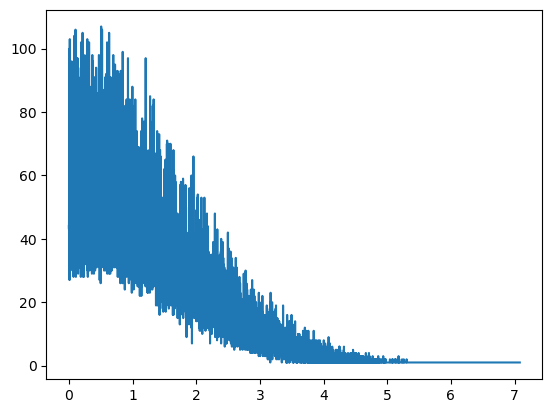

In [58]:
zsparse,zcount=np.unique(zvals,return_counts=True)
plt.plot(zsparse,zcount)
plt.show()

Turns out, quite a few!  We can take advantage of that; each time the same $z$ is processed, it would result in the same number, so we can calculate the contribution for each $z$ once and then mulitply by the number of times it appears.

/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9740000e+00 6.9910002e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


0 76.48216
1 8.331021
2 1.4046497
3 0.25546739
4 0.049103808
5 0.009644568
6 0.0019933288
7 0.0006577148


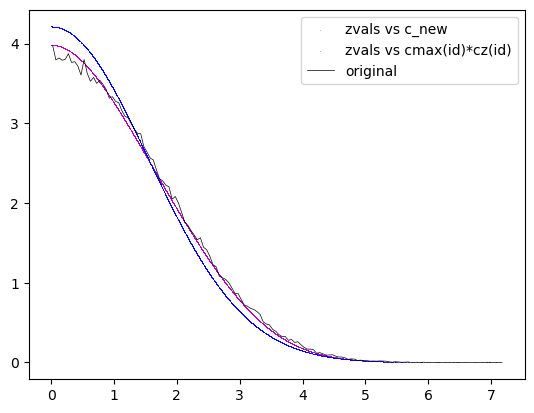

In [61]:
newp = np.array([1.35,0.33,-0.04])
c_new = converge_c(newp,zvals,cz_start='ideal',lim=0.001,verbose=True)
plt.scatter(zvals,c_new,s=0.1,lw=0.1,c='m', label='zvals vs c_new')
plt.scatter(zvals,cmax_ideal*cz_ideal(zvals),s=0.1,lw=0.1,c='b', label='zvals vs cmax(id)*cz(id)')
plt.plot(z,concentration_profiles[0],'k',lw=0.5, label='original')
plt.legend()
plt.show()

/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9740000e+00 6.9910002e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


0 13.363842
1 1.5527601
2 0.26444435
3 0.048486248
4 0.009332019
5 0.0018396403
6 0.00037593924


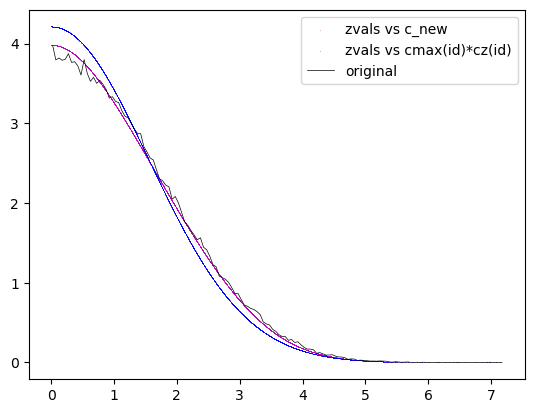

In [62]:
# we can converge faster with sparse data. (?)
newp = np.array([1.35,0.33,-0.04])
zsparse,zcount=np.unique(zvals,return_counts=True)
c_new_sparse = converge_c(newp,zsparse,cz_start='ideal',lim=0.001,verbose=True)
plt.scatter(zsparse,c_new_sparse,s=0.1,lw=0.1,c='m', label='zvals vs c_new')
plt.scatter(zsparse,cmax_ideal*cz_ideal(zsparse),s=0.1,lw=0.1,c='b', label='zvals vs cmax(id)*cz(id)')
plt.plot(z,concentration_profiles[0],'k',lw=0.5, label='original')
plt.legend()
plt.show()

In [63]:
def neglliter(a,z,cz_start,counts=None,lim=0.0001,verbose=False,print_val=False,doeval=False):
    if len(z)!= len(cz_start):
        print("x and y data does not match length")
        return
    if doeval == True:
        lim = 1
    # generate the new concentration with these parameters
    cz = converge_c(a,z,cz_start,lim=lim,verbose=verbose)
    # divide by cmax_ideal to make the numbers smaller, 
    # it's a constant so it doesn't affect the results     
    terms = np.log(cz/cmax_ideal)
    # if we don't know how many of each value there are,
    # just add them all up
    if counts is None:
        csum = np.sum(terms)
    else:
        # if we DO know how many of each value there are
        # then just do each value once, and multiply
        # by the number of counts
        csum = np.dot(counts,terms)
    if print_val:
        print("csum",csum)
    return -1*csum

In [64]:
from timeit import default_timer as timer

In [65]:
# summing over all the values is slow
start = timer()
results = minimize(neglliter,newp,args=(zvals,c_new),method='Nelder-Mead',options={'maxiter':200})
# this one also works pretty well
#results = minimize(neglliter,newp,args=(zvals,c_new),method='COBYLA',options={'rhobeg':0.001})
end = timer()
print(end-start)

/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9740000e+00 6.9910002e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


301.5408015078865


In [66]:
# plot the results
print(results)
c_opt = converge_c(results.x,zvals,cz_start=c_new,lim=0.0001,verbose=False)
optp = results.x
print(optp)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 105700.40625
             x: [ 2.465e+00  2.242e-01 -2.071e-02]
           nit: 112
          nfev: 258
 final_simplex: (array([[ 2.465e+00,  2.242e-01, -2.071e-02],
                       [ 2.465e+00,  2.242e-01, -2.071e-02],
                       [ 2.465e+00,  2.242e-01, -2.071e-02],
                       [ 2.465e+00,  2.242e-01, -2.071e-02]]), array([ 1.057e+05,  1.057e+05,  1.057e+05,  1.057e+05]))


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9740000e+00 6.9910002e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


[ 2.46487201  0.2241518  -0.02070808]


In [67]:
# yep, we have reduced the negative log likelihood, 
# i.e. maximized the likelihood
print(neglliter(newp,zvals,c_new,doeval=True))
print(neglliter(optp,zvals,c_opt,doeval=True))

105751.96875
105700.5625


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9740000e+00 6.9910002e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


See what the improved solution looks like! (red line vs magenta line)

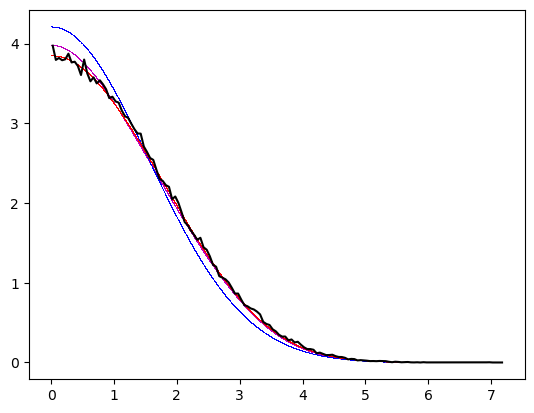

In [68]:
plt.scatter(zvals,c_new,s=0.1,lw=0.1,c='m')
plt.plot(z,concentration_profiles[0],'k')
plt.scatter(zvals,cmax_ideal*cz_ideal(zvals),s=0.1,lw=0.1,c='b')
plt.scatter(zvals,c_opt,s=0.1,lw=0.1,c='r')
plt.show()

Note we can make this much faster by noting that there are a lot of repeats of each value, so we can simplify the sum (MIGHT be slightly different because of rounding).


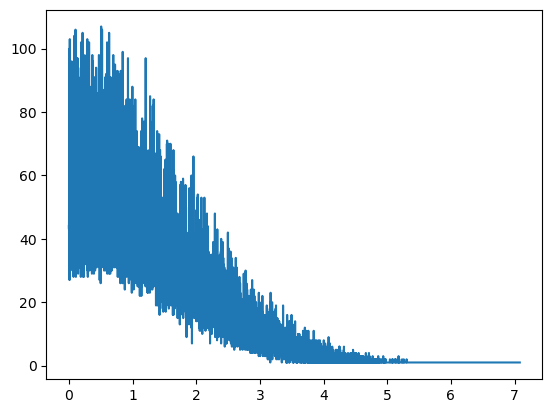

In [69]:
zsparse,zcount=np.unique(zvals,return_counts=True)
plt.plot(zsparse,zcount)
plt.show()

In [70]:
# this is now much faster, and gives essentially the same answer.
start = timer()
results = minimize(neglliter,newp,args=(zsparse,c_new_sparse,zcount),method='Nelder-Mead')
end = timer()
print("time=",end-start)
print(results)
full_opt = results.x

/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9740000e+00 6.9910002e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


time= 1.4188560801558197
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 105700.49894010276
             x: [ 2.383e+00  2.246e-01 -2.056e-02]
           nit: 97
          nfev: 219
 final_simplex: (array([[ 2.383e+00,  2.246e-01, -2.056e-02],
                       [ 2.383e+00,  2.246e-01, -2.056e-02],
                       [ 2.383e+00,  2.246e-01, -2.056e-02],
                       [ 2.383e+00,  2.246e-01, -2.056e-02]]), array([ 1.057e+05,  1.057e+05,  1.057e+05,  1.057e+05]))


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9740000e+00 6.9910002e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


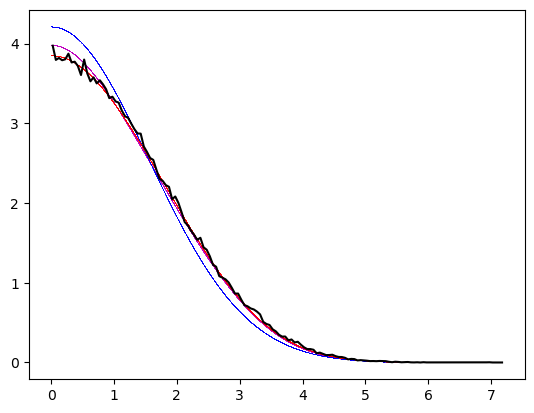

In [71]:
# now plot the new data 
c_opt_sparse = converge_c(results.x,zsparse,cz_start=c_new_sparse,verbose=False)
plt.scatter(zsparse,c_new_sparse,s=0.1,lw=0.1,c='m')
plt.plot(z,concentration_profiles[0],'k')
plt.scatter(zsparse,cmax_ideal*cz_ideal(zsparse),s=0.1,lw=0.1,c='b')
plt.scatter(zsparse,c_opt_sparse,s=0.1,lw=0.1,c='r')
plt.show()

Note that the parameters are somewhat different, but the curves are about the same; the space appears to be relatively degenerate, in that there's a large volume of parameters that all give similar results. But that's probably OK for osmotic coefficients, as there will also be many parameters that thus give about the same osmotic coefficient. 

This seems to work!  Things to do:

1. Implement bootstrapping. A key here is one can now bootstrap over all the SAMPLES (like 188,000), not the profiles (4).
2. See what happens when you use all the data from the trajectories.  You can just dump them all into one big array - the bootstrapping is on samples, not on the trajectories.
3. See if you can get away with 2 paramters, not 3, and still get a good fit.  
4. Bootstrap around the osmotic coefficient/pressure calculation given the curve - this will be much less noisy than the parameters themselves. 


In [72]:
# Function to perform bootstrapping over _samples_
def bootstrap_samples(samples, n_boot, minfunc, init_params):
    zinit=np.unique(samples)
    c_start = converge_c(init_params,zinit,cz_start='ideal',verbose=False)
    bootstrap_params = list()
    bootstrap_cs = list()
    n_samples = len(samples)
    for i in range(n_boot):
        # Resample with replacement
        indices = np.random.randint(0,n_samples,size=n_samples)
        bootstrap_sample = samples[indices]
        zsparse,zcount=np.unique(bootstrap_sample,return_counts=True)
        # we can't use the old concentrations since they are at potentially different z
        # so interpolate (should be negligible error)
        c_new = np.interp(zsparse,zinit,c_start)
        result = minimize(minfunc,init_params,args=(zsparse,c_new,zcount),method="Nelder-Mead")
        print(i,result.x,result.fun)
        bootstrap_params.append(result.x)
        # generate a converged concentration at this point. Make the locations
        # at the same points as the original
        c_new = converge_c(result.x,zsparse,cz_start=c_new)
        c_new = np.interp(zinit,zsparse,c_new)
        bootstrap_cs.append(c_new) 
    return np.array(bootstrap_params), np.array(bootstrap_cs)

In [73]:
bparams,bcs = bootstrap_samples(zvals,500,neglliter,results.x)

/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9740000e+00 6.9910002e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)
/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9730005e+00 6.9740000e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


0 [ 2.90498745  0.19973579 -0.01570535] 106204.49029722063


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9429998e+00 6.9730005e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


1 [ 3.47826651  0.20819588 -0.01934224] 106355.90060017748


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9129996e+00 6.9429998e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


2 [ 2.61798094  0.19930776 -0.01547784] 105711.45140132486
3 [ 2.24204146  0.23478928 -0.02245938] 105443.09110584612


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9429998e+00 6.9730005e+00
 6.9740000e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


4 [ 2.55911309  0.20642881 -0.01759577] 105410.76035970176
5 [ 2.66782901  0.21009298 -0.01770597] 105997.0388396493


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.3970003e+00 6.5820007e+00
 6.8540001e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


6 [ 1.80818005  0.26378045 -0.02486703] 105784.72442640735


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.7459998e+00 6.9129996e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


7 [ 2.87876633  0.23331126 -0.02322143] 106429.12573558312
8 [ 2.14009921  0.23164596 -0.02142272] 105255.06807257427
9 [ 2.71627812  0.22231673 -0.02095415] 105931.61043705036
10 [ 2.66333624  0.22817611 -0.02325349] 105410.72934198315
11 [ 2.08909839  0.23039158 -0.02004562] 105548.62045748477


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9429998e+00 6.9910002e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


12 [ 2.31877253  0.2381778  -0.02348474] 105545.50987981225
13 [ 3.05941978  0.19451432 -0.01620625] 105726.21643531177


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9429998e+00 6.9740000e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


14 [ 2.41057993  0.24918485 -0.025611  ] 106057.81645884895


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9129996e+00 6.9730005e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


15 [ 2.79913188  0.19049167 -0.01496421] 105384.28747553146


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9129996e+00 6.9740000e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


16 [ 2.06595886  0.26909724 -0.02772184] 106185.17745641035
17 [ 2.36675976  0.20503472 -0.01684964] 105157.03491025364


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9730005e+00 6.9740000e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


18 [ 2.15879646  0.25895287 -0.0262986 ] 106110.46885239237


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9740000e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


19 [ 2.64809225  0.21475004 -0.01987355] 105501.71095417891
20 [ 2.52935406  0.22588438 -0.02116721] 105827.04857680887
21 [ 2.18072789  0.24548886 -0.02392042] 105759.10059979666


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9730005e+00 6.9910002e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


22 [ 2.38298085  0.24415074 -0.0245569 ] 105897.07660622755
23 [ 3.05742223  0.19176863 -0.01570179] 105617.97994109467
24 [ 2.39194287  0.21420858 -0.01864551] 105388.55487347352


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9740000e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


25 [ 2.55279666  0.22029646 -0.02127464] 105194.88043292322
26 [ 2.59553796  0.2238365  -0.0203328 ] 106153.52852114257
27 [ 2.85659533  0.21277882 -0.02009973] 105615.21791363334
28 [ 2.48083813  0.21602538 -0.01818618] 106010.19245526723


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9429998e+00 6.9730005e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


29 [ 3.50089132  0.17808542 -0.01401531] 105502.8708894445
30 [ 2.41237299  0.23567463 -0.02372301] 105418.56957632894
31 [ 3.19129148  0.19115887 -0.01531498] 105961.2975386468
32 [ 1.87804714  0.26909314 -0.02765895] 105434.90105817831
33 [ 2.99035815  0.19467283 -0.01654302] 105449.01443990249


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9730005e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


34 [ 2.7615157   0.20888089 -0.01834308] 105765.61404201697
35 [ 3.19453088  0.1960891  -0.0161806 ] 106062.67114151664
36 [ 2.59210466  0.20811256 -0.01798289] 105485.65424450213
37 [ 3.68719357  0.18702581 -0.01607393] 105751.99044013914
38 [ 2.8462928   0.22497049 -0.02175843] 106125.82975958094


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9429998e+00 6.9740000e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


39 [ 2.11825903  0.25584748 -0.02651021] 105475.23876144714


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9429998e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


40 [ 2.28092918  0.26097596 -0.02747164] 106128.88264308707
41 [ 2.12100488  0.23025396 -0.02051878] 105444.51957688225
42 [ 2.41572746  0.22474852 -0.02061639] 105648.54985865612
43 [ 2.82317266  0.23701708 -0.02458466] 106125.91130342624
44 [ 2.77241817  0.21938112 -0.02115076] 105639.96887645418
45 [ 2.38488309  0.23704157 -0.02315554] 105777.46580197832
46 [ 3.26248724  0.19103332 -0.01680677] 105399.36121791136
47 [ 2.45978293  0.21165085 -0.01826973] 105466.05564890086
48 [ 2.77696882  0.21404771 -0.02080964] 105223.99530046056
49 [ 2.49503583  0.21325352 -0.01803116] 105833.87949497055
50 [ 2.45479616  0.20889929 -0.01677461] 105792.4096324227
51 [ 2.48225664  0.2178266  -0.02021506] 105284.77218472547


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9129996e+00 6.9740000e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


52 [ 2.59820175  0.22005812 -0.01927155] 106201.33600057995


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.7459998e+00 6.8540001e+00
 6.9740000e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


53 [ 2.57061613  0.23213033 -0.02300727] 105718.81396013054
54 [ 1.8480919   0.26999087 -0.02727988] 105624.52363722962
55 [ 2.48978678  0.23750069 -0.02390573] 105756.22313731069
56 [ 2.84143274  0.2246997  -0.02182932] 106042.77531267583
57 [ 1.92971266  0.26124798 -0.02621   ] 105497.55471595014
58 [ 2.30255299  0.24676045 -0.02448758] 106011.85420555277
59 [ 2.73522259  0.18830462 -0.01267061] 106051.44046594032


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.5820007e+00 6.8540001e+00
 6.9429998e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


60 [ 1.85976556  0.25566796 -0.02379605] 105699.02451683926
61 [ 2.00600628  0.25483018 -0.02449027] 105943.11444233215
62 [ 2.15228321  0.24701871 -0.0242279 ] 105694.747809082
63 [ 2.50060531  0.22490065 -0.0211382 ] 105700.22868614845


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.4919996e+00 6.9730005e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


64 [ 2.64082773  0.20881774 -0.01828594] 105507.82246718112
65 [ 2.52389796  0.21844029 -0.02010583] 105490.65773956574
66 [ 3.42192307  0.18438872 -0.01488221] 105712.40976787238
67 [ 2.14693903  0.21884951 -0.01757684] 105682.10817186678


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9429998e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


68 [ 2.77045056  0.19544083 -0.01543394] 105626.06781496856
69 [ 2.50748016  0.21973318 -0.02011107] 105614.93026402371
70 [ 2.74404649  0.22607269 -0.02189964] 105976.4967582491
71 [ 2.31207845  0.21600641 -0.01792967] 105633.48344263229


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9129996e+00 6.9730005e+00
 6.9740000e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


72 [ 2.51534819  0.21773327 -0.0199453 ] 105482.64069715
73 [ 2.03539229  0.26873378 -0.02824627] 105764.66644578047
74 [ 2.25621683  0.2477554  -0.02490786] 105813.01093964235


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.4919996e+00 6.9429998e+00
 6.9730005e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


75 [ 1.99309591  0.25609628 -0.02653651] 105027.42632545102
76 [ 3.16183547  0.2060589  -0.01846352] 106128.43153157605
77 [ 2.43433121  0.22096537 -0.02031018] 105419.64801405015
78 [ 1.85556298  0.25263007 -0.02378027] 105392.57122807774


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9910002e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


79 [ 2.61035067  0.22320078 -0.02062794] 105962.0980781602
80 [ 2.00494337  0.27914169 -0.03105982] 105512.96484323968
81 [ 2.48838363  0.21547031 -0.01901646] 105551.94116693675
82 [ 2.99370029  0.19768543 -0.01624141] 105939.99093383251
83 [ 2.26573375  0.23404826 -0.02270727] 105280.01511482947
84 [ 2.17584887  0.2616087  -0.02691318] 106129.02358512903
85 [ 3.15553369  0.20594426 -0.01919263] 105749.82514352232
86 [ 2.40541582  0.24037272 -0.02570202] 105029.33757262878
87 [ 2.6168348   0.22646496 -0.022059  ] 105740.3498047487
88 [ 2.35683909  0.24437556 -0.02427573] 105990.39523483421
89 [ 2.64136742  0.21974276 -0.02031797] 105817.18697704982
90 [ 2.65763395  0.21137053 -0.0189071 ] 105595.04257535235
91 [ 4.3058836   0.16888811 -0.01369897] 105409.15776734253
92 [ 2.36301947  0.23707901 -0.02354793] 105565.7598563871


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.5820007e+00 6.8540001e+00
 6.9730005e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


93 [ 3.25635111  0.19239167 -0.016317  ] 105706.92338374878
94 [ 4.04811563  0.17494433 -0.01373308] 105860.29476302562
95 [ 1.6263852   0.28742896 -0.03020085] 105049.55881583405


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.7459998e+00 6.9129996e+00
 6.9730005e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


96 [ 2.31566857  0.23703946 -0.0230935 ] 105608.63599825911


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.5820007e+00 6.7459998e+00
 6.9429998e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


97 [ 3.02534285  0.19275727 -0.01543919] 105770.14854144075
98 [ 2.01145888  0.26055869 -0.02623883] 105737.47943391801
99 [ 2.41243517  0.21938054 -0.01917892] 105735.85497957384
100 [ 2.34773791  0.23764575 -0.02232514] 106160.02987915653
101 [ 1.55763684  0.28273785 -0.02794216] 105234.56490006502
102 [ 2.32226893  0.23096996 -0.0220643 ] 105427.65905313808
103 [ 2.39125468  0.25264343 -0.026897  ] 105783.95689812876
104 [ 1.75205522  0.26865885 -0.02697071] 105248.46258424308
105 [ 3.22353915  0.20516885 -0.01887062] 105908.68228712269
106 [ 2.34787157  0.2391096  -0.02370739] 105663.28892958339
107 [ 3.11925431  0.17769553 -0.01340713] 105267.72969531767
108 [ 2.35830145  0.23571903 -0.02245663] 105867.10279272131
109 [ 2.48972227  0.22434091 -0.0203145 ] 105975.94265295907
110 [ 2.10755955  0.2554371  -0.02547002] 105929.39853842398


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.5820007e+00 6.9129996e+00
 6.9730005e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


111 [ 2.59256637  0.23159067 -0.02384811] 105332.56785499363
112 [ 2.57503098  0.22540767 -0.0217428 ] 105610.79368858735
113 [ 2.50983197  0.22921185 -0.02156479] 105983.81828609256


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9129996e+00 6.9730005e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


114 [ 2.18695548  0.24059721 -0.02266569] 105810.40936194183
115 [ 2.21947066  0.23196974 -0.02126964] 105588.11223249875
116 [ 3.07333478  0.19146163 -0.01539739] 105765.37897985734
117 [ 2.41800339  0.23493476 -0.02269433] 105837.9436793032
118 [ 2.79084564  0.21497307 -0.01937792] 106026.76678095359
119 [ 2.5149956   0.19554553 -0.01426209] 105685.83943828249
120 [ 2.80682284  0.1928955  -0.01541257] 105496.02414187252
121 [ 2.55936826  0.22274638 -0.02138598] 105489.6896500074
122 [ 1.78879612  0.2695232  -0.02603804] 105922.15200611638
123 [ 2.43722147  0.23621091 -0.02355038] 105657.09689860583
124 [ 2.44996957  0.24084544 -0.02451413] 105753.09740443686
125 [ 2.85495078  0.19127847 -0.01473154] 105698.49574065552
126 [ 3.32021187  0.19343736 -0.01615795] 106016.22455202733
127 [ 2.52423573  0.22305948 -0.02081341] 105646.25805147667
128 [ 2.80875481  0.23526886 -0.02387359] 106185.7336413708
129 [ 1.89204965  0.24765158 -0.02272372] 105434.6510976367
130 [ 1.90140307  0.2928315 

/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.7459998e+00 6.9740000e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


131 [ 3.08145776  0.19605071 -0.01626117] 105866.80416873062
132 [ 3.617311    0.18300577 -0.01518131] 105688.50455441879
133 [ 2.57800807  0.23762667 -0.02426965] 105812.34884597716
134 [ 2.52948829  0.22406917 -0.02151421] 105490.97763003489
135 [ 2.04890722  0.23885581 -0.02145528] 105650.76024599989
136 [ 2.3432532   0.24063134 -0.02459538] 105350.3644673349
137 [ 2.55272388  0.21628896 -0.01885585] 105868.90076818835
138 [ 3.71733869  0.17394372 -0.01335371] 105590.95192754696
139 [ 2.22003933  0.23304151 -0.0212774 ] 105688.93521857006
140 [ 2.2363931   0.2331218  -0.02132097] 105783.62413549793


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9129996e+00 6.9429998e+00
 6.9730005e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


141 [ 2.32743554  0.26273746 -0.0291646 ] 105646.2394251483


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9129996e+00 6.9910002e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


142 [ 2.41985893  0.21796424 -0.01883008] 105750.78881061057
143 [ 2.23227895  0.24249205 -0.02314227] 105931.12025258884
144 [ 2.41737847  0.21348454 -0.01886254] 105270.4728455087
145 [ 2.21017042  0.21805959 -0.01846727] 105295.26535400098
146 [ 2.19562457  0.24806578 -0.02413905] 105981.16519729565
147 [ 2.28283299  0.22062238 -0.01945049] 105420.18002493393
148 [ 3.03685405  0.2132617  -0.02037193] 105796.55872995744
149 [ 2.99995471  0.2026272  -0.01947857] 105016.84864717037


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9129996e+00 6.9429998e+00
 6.9740000e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


150 [ 2.15471738  0.25375907 -0.0252007 ] 105961.20085217884


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9429998e+00
 6.9740000e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


151 [ 2.40138305  0.21790147 -0.019109  ] 105591.03729578137
152 [ 2.59048016  0.22497676 -0.02107053] 105872.979475126


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9129996e+00 6.9429998e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


153 [ 2.40900933  0.22410141 -0.02080037] 105541.56969408337
154 [ 2.46446805  0.20285943 -0.01628289] 105381.86727201377
155 [ 3.55784818  0.18461333 -0.01461546] 106054.15482680718
156 [ 2.95005836  0.20867052 -0.01841351] 106061.37036606565
157 [ 2.77735176  0.22361972 -0.02184709] 105852.86457401938
158 [ 2.88054269  0.19569054 -0.01612353] 105571.09757596046
159 [ 2.77252695  0.20066478 -0.01565742] 106108.95112324845
160 [ 3.32870385  0.19293297 -0.01674992] 105660.74655003047


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9129996e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


161 [ 2.03116098  0.24951357 -0.02446953] 105450.02100560605
162 [ 2.604671    0.20756783 -0.01664081] 106073.75886156961
163 [ 2.30358013  0.24112128 -0.02441237] 105411.5108541431
164 [ 2.60559818  0.21739041 -0.02014137] 105522.89840127557
165 [ 2.7194842   0.21333821 -0.01983518] 105512.03698630605
166 [ 3.23175827  0.18122638 -0.01387618] 105608.11476179188
167 [ 2.225782    0.2476345  -0.02425812] 106011.95634482757
168 [ 3.07108094  0.19206892 -0.01539298] 105843.00726058666
169 [ 3.13265217  0.20584213 -0.01875296] 105919.18325785345
170 [ 2.6121146   0.20967704 -0.01865018] 105433.69891001825
171 [ 2.27588142  0.23580938 -0.02211824] 105816.57391064885
172 [ 3.15962031  0.19594994 -0.01738961] 105477.5006453007
173 [ 3.17925879  0.20289719 -0.01831133] 105835.08429084241
174 [ 2.75935261  0.2140457  -0.01943178] 105826.07074714285
175 [ 2.07660083  0.23638477 -0.02215708] 105197.19111210557
176 [ 2.03227864  0.25089044 -0.02465171] 105502.17239078428
177 [ 1.97858332  0.265200

/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.7459998e+00 6.9730005e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


188 [ 2.67792163  0.20546964 -0.01805985] 105344.78057272152
189 [ 2.02991209  0.26782148 -0.02748488] 106011.23602503804
190 [ 3.43632512  0.17284074 -0.01122879] 106101.79407904424
191 [ 2.38618992  0.23887811 -0.02421062] 105520.67907413375
192 [ 2.57691604  0.21174034 -0.01815681] 105777.8634957519
193 [ 2.4554138   0.23236467 -0.02308881] 105479.19298404135
194 [ 2.7941971   0.21438564 -0.0194313 ] 105932.90075666977
195 [ 1.91615651  0.25707725 -0.02426931] 105884.02573400935


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9129996e+00
 6.9730005e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


196 [ 2.37046158  0.23803302 -0.02300506] 105886.0823689927
197 [ 2.54338181  0.211798   -0.01792268] 105802.8027620902
198 [ 3.54743111  0.17467628 -0.01213432] 106013.01630368711
199 [ 3.13574948  0.19101185 -0.01552096] 105729.00987815353
200 [ 2.52262475  0.2216757  -0.02083642] 105550.94009537257
201 [ 2.65676746  0.22224067 -0.02137434] 105624.51870154141
202 [ 3.59402308  0.17907996 -0.01426408] 105597.1373843811
203 [ 2.28854842  0.24054526 -0.0244101 ] 105327.5897445155
204 [ 3.21369424  0.18669259 -0.01514208] 105580.12854522269


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.7459998e+00 6.9129996e+00
 6.9740000e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


205 [ 2.0783464   0.25256648 -0.02537191] 105512.44445419419
206 [ 2.39877002  0.24860703 -0.02640805] 105572.7110096193
207 [ 2.91454306  0.19921911 -0.01674662] 105728.33497973987
208 [ 2.38396981  0.2212835  -0.02003008] 105506.8114987544
209 [ 2.14345902  0.22481195 -0.01914948] 105551.07895901868
210 [ 2.53752401  0.23282269 -0.02371452] 105454.34678149772
211 [ 2.45304817  0.23074794 -0.02157098] 105967.67069288423
212 [ 2.81807156  0.19430645 -0.01609779] 105309.2317446027
213 [ 2.38255223  0.23491114 -0.02319319] 105524.47241200678
214 [ 2.79811921  0.18523562 -0.01340418] 105504.33382944902
215 [ 2.38531103  0.23540175 -0.02277139] 105799.74489439862
216 [ 2.14481979  0.25114441 -0.0246931 ] 105914.6718912113
217 [ 3.91902545  0.163128   -0.01129589] 105592.03261078974
218 [ 2.01735664  0.26056192 -0.02599674] 105885.08236995012
219 [ 2.5695594   0.21598805 -0.01906641] 105800.43334590796
220 [ 2.20734998  0.23432639 -0.02012039] 106315.97529438294
221 [ 2.48251932  0.21743675

/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9730005e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


250 [ 1.91065988  0.27969716 -0.02921726] 106105.82962196019
251 [ 3.10559187  0.2053882  -0.01842276] 105995.54572766687
252 [ 2.2574939   0.24035927 -0.02355951] 105570.80349399909
253 [ 1.99626972  0.25284411 -0.02445986] 105657.95602160152
254 [ 2.60439738  0.22369918 -0.02205035] 105385.0935543633
255 [ 2.49401081  0.21116813 -0.01875874] 105266.81186489332
256 [ 2.45194278  0.21229789 -0.01812606] 105549.65481913072
257 [ 2.17318127  0.23644631 -0.02176579] 105684.29145207953
258 [ 2.50830668  0.22627528 -0.02173246] 105571.67831133286
259 [ 2.56807689  0.2054372  -0.0177348 ] 105262.14716748358
260 [ 2.12496982  0.22463249 -0.01889723] 105594.7774050832
261 [ 2.4236083   0.22724681 -0.0208311 ] 105858.28193973028
262 [ 2.64522461  0.22373622 -0.02175755] 105601.93933356309
263 [ 2.2349485   0.23398265 -0.02196704] 105579.01641532495
264 [ 2.37226479  0.21253362 -0.01808721] 105387.721479681
265 [ 2.23983806  0.23945213 -0.021955  ] 106198.90506110212
266 [ 2.40966805  0.22673178

/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.5820007e+00 6.9730005e+00
 6.9740000e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


283 [ 3.3548494   0.19406472 -0.01756388] 105430.18651103218
284 [ 2.57160824  0.21162642 -0.01725889] 106182.61734632844
285 [ 2.62512901  0.21805332 -0.02022361] 105643.65155677666


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.5820007e+00 6.9730005e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


286 [ 2.10545118  0.24122779 -0.02290407] 105502.65348645637


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.4700012e+00 6.4919996e+00
 6.9740000e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


287 [ 2.68113435  0.22080038 -0.02009675] 106083.44107727525
288 [ 1.96070662  0.27396048 -0.02889382] 105821.75670378345
289 [ 2.53574914  0.21705725 -0.02009176] 105391.58714794359
290 [ 3.18618626  0.21444248 -0.02028385] 106203.00271932763


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9730005e+00
 6.9740000e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


291 [ 2.39796264  0.2144918  -0.01864785] 105427.6255575688
292 [ 3.27252324  0.1984204  -0.01777786] 105714.19879314689
293 [ 3.0118626   0.20469011 -0.01816608] 105825.736645112
294 [ 2.66042332  0.20055023 -0.01661248] 105452.45531815759
295 [ 2.13393025  0.22376419 -0.01984512] 105086.40554313226
296 [ 2.12021213  0.25041786 -0.02470807] 105714.91155027744
297 [ 2.67957319  0.20546908 -0.01757793] 105589.47692000178
298 [ 2.83794714  0.2173815  -0.02074692] 105730.85962120017
299 [ 3.75923208  0.19160987 -0.01622055] 106272.88622909006
300 [ 3.385177    0.16973226 -0.01290397] 104983.71534321555
301 [ 2.40962044  0.23049013 -0.02158233] 105863.28491618596
302 [ 2.86272405  0.22901745 -0.02265992] 106174.36418407236
303 [ 2.11866747  0.25363172 -0.02466883] 106158.11000666882
304 [ 3.24618069  0.19114936 -0.01611024] 105699.65785318623
305 [ 2.32411908  0.24377543 -0.02422169] 105886.31498121815
306 [ 2.19925502  0.233049   -0.02127457] 105664.12945558393


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9129996e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


307 [ 1.92078059  0.24662871 -0.02192979] 105831.47064998632
308 [ 1.82241727  0.26849445 -0.02644377] 105772.16193810645
309 [ 2.31059094  0.24157029 -0.02398691] 105714.94177855931
310 [ 2.35824792  0.23713555 -0.02256094] 106026.83599459729
311 [ 1.94272867  0.25423793 -0.02508975] 105300.96609658701
312 [ 2.49509038  0.22625969 -0.02147771] 105638.43710665537
313 [ 2.1233638   0.25054136 -0.02330572] 106406.53421479496
314 [ 2.10700247  0.24687609 -0.02399656] 105632.70433113106
315 [ 1.71116592  0.27214839 -0.02635159] 105638.33313303815
316 [ 1.95949869  0.2566183  -0.02510746] 105655.11441844254
317 [ 2.2179029   0.24923392 -0.02510426] 105719.52821238064
318 [ 2.91166295  0.21377724 -0.01950072] 106097.32110754547
319 [ 2.51171836  0.21946317 -0.02017723] 105553.90745715424
320 [ 2.88938607  0.21616435 -0.01976234] 106194.74411351542
321 [ 1.68732935  0.30816161 -0.03374803] 106026.94307686863
322 [ 2.98119117  0.18306387 -0.0133758 ] 105625.59519434057
323 [ 2.74092809  0.2162

/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.7459998e+00 6.9910002e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


333 [ 1.80237385  0.28726673 -0.02964249] 106260.0570072766
334 [ 2.54355562  0.23548735 -0.02357062] 105807.37238607663
335 [ 1.99326506  0.26189784 -0.02636701] 105798.33689097871
336 [ 2.41843139  0.22463419 -0.02115696] 105420.45899484781
337 [ 2.15461495  0.25038679 -0.0249393 ] 105761.66575921747
338 [ 4.32996554  0.15551481 -0.00995457] 105665.5634684635
339 [ 3.05250038  0.19824685 -0.01743305] 105559.83878741156
340 [ 2.42576687  0.21922806 -0.01968705] 105490.2722490629
341 [ 2.17378821  0.25519141 -0.02578892] 105918.57079963412
342 [ 2.71414037  0.22572732 -0.02177307] 105938.1544620543
343 [ 3.57658634  0.18894194 -0.01616564] 105806.9577178637
344 [ 2.4463411   0.21394044 -0.01836592] 105579.62255632339
345 [ 1.98740431  0.26043417 -0.02632807] 105601.19536519371
346 [ 1.67416354  0.29220151 -0.02992472] 106023.53555069117
347 [ 2.94285923  0.20914251 -0.01884462] 105906.7265948807
348 [ 2.38175407  0.22953532 -0.02158596] 105644.1819936741
349 [ 2.79808085  0.19544399 -0

/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.5820007e+00 6.9129996e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


401 [ 2.28388141  0.23563331 -0.02247512] 105629.12139434933
402 [ 2.63928676  0.23444939 -0.02323822] 106099.81471231142
403 [ 2.35534965  0.23144705 -0.02130741] 105923.63500629948
404 [ 2.66532063  0.2104087  -0.01860737] 105588.12151817163


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9129996e+00
 6.9740000e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


405 [ 1.87690261  0.27462862 -0.02882266] 105514.06233158213
406 [ 2.45295923  0.2078141  -0.0177241 ] 105255.12481711994
407 [ 2.33019788  0.23116583 -0.02183963] 105652.90204464772
408 [ 2.47138312  0.19806269 -0.01532033] 105365.05350367428
409 [ 1.95435146  0.26771265 -0.02809056] 105475.6765073052
410 [ 2.28741427  0.2332612  -0.0228765 ] 105203.51780186241
411 [ 2.3723388   0.22974466 -0.02121345] 105825.24313933578
412 [ 2.94779308  0.20596263 -0.01786508] 106005.06144805637
413 [ 3.37641674  0.16825635 -0.01013058] 106038.22569734971
414 [ 2.23327271  0.25080636 -0.02553541] 105773.28763452775
415 [ 2.85317671  0.17361217 -0.01143592] 105264.3319301217
416 [ 2.49281208  0.227158   -0.02061579] 106125.68786909555
417 [ 2.23245422  0.24296483 -0.02393034] 105670.62283257482
418 [ 2.01281036  0.26176073 -0.02649079] 105767.43064989605
419 [ 1.69754893  0.28480705 -0.02894123] 105774.45774838328
420 [ 3.6402544   0.18585266 -0.01559086] 105835.66878646001


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.4700012e+00 6.9730005e+00
 6.9740000e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


421 [ 1.80649076  0.26697266 -0.02686682] 105286.3727113081
422 [ 1.93993474  0.27518389 -0.02880627] 105893.7106704402


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.7459998e+00 6.9730005e+00
 6.9740000e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


423 [ 2.53992638  0.21788642 -0.01998322] 105542.64531557098
424 [ 2.16900879  0.23970857 -0.02311434] 105455.28635208697
425 [ 2.60057948  0.20740362 -0.01780917] 105521.41999084965
426 [ 2.99031343  0.20781541 -0.01810335] 106206.79184381239
427 [ 2.56077722  0.22314385 -0.01938033] 106432.93377463437
428 [ 2.94535499  0.17709821 -0.01333036] 104957.71767555323
429 [ 2.43485832  0.2073438  -0.01693907] 105485.8535406846
430 [ 2.70047472  0.20027996 -0.01632394] 105633.05373966288
431 [ 2.78280521  0.22984982 -0.02324528] 105850.085187476
432 [ 2.21462157  0.22147556 -0.01945459] 105274.84128855061
433 [ 2.79725608  0.20132139 -0.01768466] 105323.05742605815
434 [ 1.77043216  0.28288428 -0.0292894 ] 105750.18493158765
435 [ 2.17952381  0.21489258 -0.01648422] 105792.6327919629
436 [ 2.51671909  0.21714928 -0.01929733] 105701.03159371162


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9129996e+00
 6.9429998e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


437 [ 2.32561648  0.23788811 -0.02253213] 105981.36207713457
438 [ 2.03612435  0.26371007 -0.02700665] 105817.7262290648
439 [ 2.37352652  0.25654524 -0.02760623] 105825.51765243807
440 [ 2.40290016  0.23510606 -0.02272253] 105777.27655591941
441 [ 2.87394769  0.20239999 -0.01745261] 105680.04023383319
442 [ 1.95367872  0.28224527 -0.03073929] 105875.83816192218
443 [ 2.70541491  0.22209952 -0.0205562 ] 106055.41815114781
444 [ 2.81692681  0.20558165 -0.01745134] 105958.1684978194
445 [ 2.38527071  0.22496726 -0.02110746] 105383.13703850361
446 [ 1.70456115  0.30931083 -0.03374669] 106288.93349343656
447 [ 2.11691347  0.24562356 -0.02372924] 105665.90614255532
448 [ 2.34827023  0.21855645 -0.01828341] 105909.11569510296
449 [ 2.45587525  0.20952272 -0.0169608 ] 105769.59573143661
450 [ 2.84206036  0.21603753 -0.02093643] 105562.72064085359
451 [ 3.33702262  0.18723394 -0.01571449] 105559.71309165817
452 [ 2.61883263  0.20624315 -0.01868273] 105073.59980239565
453 [ 3.07172916  0.199708

/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9429998e+00
 6.9730005e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


463 [ 2.26963351  0.20557562 -0.01623935] 105225.01422128153
464 [ 2.49680525  0.20508738 -0.0161947 ] 105739.77578282662
465 [ 3.07183316  0.20191897 -0.01695096] 106198.60271588614


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.5820007e+00 6.7459998e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


466 [ 1.97082055  0.247734   -0.0228348 ] 105725.35012909921
467 [ 2.93939395  0.17628355 -0.01296409] 104994.98940854834
468 [ 2.19698543  0.24894534 -0.02531575] 105558.20467760022
469 [ 2.76395049  0.21099183 -0.01786675] 106163.84429108296
470 [ 2.50107841  0.21571242 -0.01920065] 105538.5184088879
471 [ 2.69666936  0.22305139 -0.02109874] 105913.50082214971
472 [ 2.02106769  0.25352051 -0.02451846] 105787.54437722618
473 [ 1.99491736  0.241083   -0.02240672] 105309.53958650008
474 [ 2.65448484  0.21716016 -0.01993626] 105718.76282896675


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.4919996e+00 6.9129996e+00
 6.9730005e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


475 [ 2.32029789  0.23216926 -0.02189482] 105614.38232223838
476 [ 4.3763393   0.17082594 -0.01256621] 106176.80313001687


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.7459998e+00 6.9429998e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


477 [ 2.5949922   0.22427659 -0.02154485] 105626.01889046418
478 [ 2.57226904  0.22535708 -0.0209849 ] 105943.84396148495
479 [ 2.365943    0.22153859 -0.01972724] 105590.37089198928
480 [ 3.72369323  0.18328747 -0.01465194] 106038.02097184383
481 [ 2.35437722  0.22460967 -0.01993845] 105797.69802925376
482 [ 3.07406599  0.21493881 -0.02115954] 105686.24784868705
483 [ 2.50531095  0.21671107 -0.01915989] 105711.6433739659
484 [ 2.51469261  0.21543861 -0.01892155] 105687.18304412742


/tmp/ipykernel_384697/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.7459998e+00 6.8540001e+00
 6.9730005e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


485 [ 3.20533491  0.17973561 -0.01313387] 105680.91251420912
486 [ 2.63835565  0.21365713 -0.01837108] 106041.43760636848
487 [ 2.4577538   0.23051203 -0.02230011] 105659.03187135622
488 [ 2.34187546  0.2327602  -0.02183331] 105815.96269842863
489 [ 2.86730028  0.20873968 -0.01926582] 105560.1364491629
490 [ 2.09332991  0.22581306 -0.01953785] 105325.5346001928
491 [ 2.47028888  0.23565769 -0.02253629] 106146.32661407544
492 [ 2.1224258   0.24994722 -0.02425817] 105929.97896818852
493 [ 3.15970888  0.19279    -0.01596641] 105755.37032185875
494 [ 2.0043087   0.22656936 -0.01929357] 105201.16126510581
495 [ 2.57220467  0.21912914 -0.01992803] 105788.77442169734
496 [ 2.44856868  0.23560429 -0.02318495] 105788.23272434881
497 [ 2.02908517  0.23994954 -0.02223564] 105363.17248030961
498 [ 1.99608888  0.24511592 -0.02252411] 105730.57120035475
499 [ 2.07096188  0.24669117 -0.02262889] 106068.55571031525


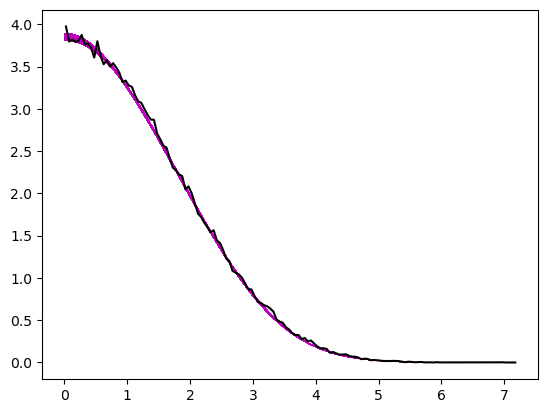

In [74]:
# now plot the new data 
for i in range(len(bcs)):    
    plt.scatter(zsparse,bcs[i],s=0.1,lw=0.1,c='m')
plt.plot(z,concentration_profiles[0],'k')
plt.show()

In [75]:
# compute the correlation coefficients
stdparam = np.std(bparams,axis=0)
mxy = np.outer(stdparam,stdparam) #<x><y>
covparam = np.cov(bparams.T,ddof=0) # <xy>
#print(covparam)
covcorr = covparam/mxy
print(covcorr)

[[ 1.         -0.86817007  0.77857922]
 [-0.86817007  1.         -0.97705476]
 [ 0.77857922 -0.97705476  1.        ]]


Note that parameters are highly correlated, as you can see by the correlation matrix  - there are multiple parameters that give essentially the same result. It may be a 2 parameter fit is enough!  Bootstrapping over osmotic coefficients should give less noisy results.

Parma 0 = 2.5341016793743054 +/- 0.4551568640337047


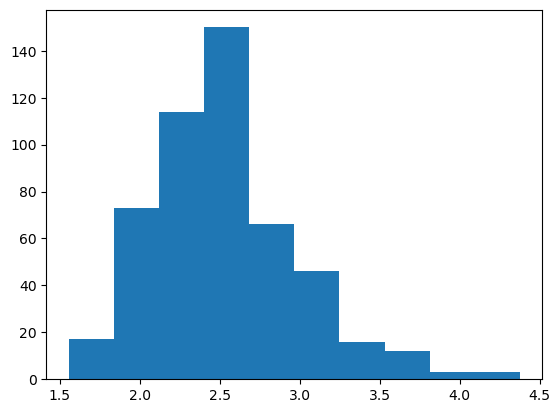

Parma 1 = 0.22463370326903834 +/- 0.02589321773028383


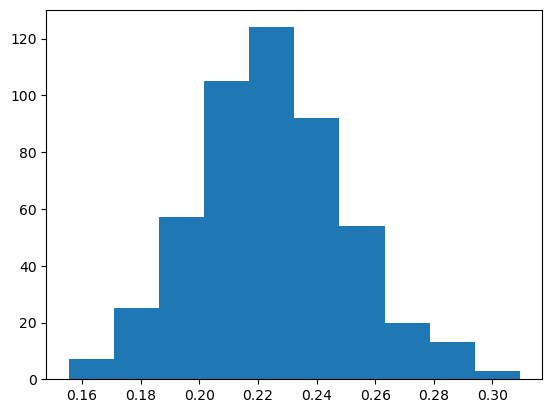

Parma 2 = -0.020764566055768638 +/- 0.004139085508518257


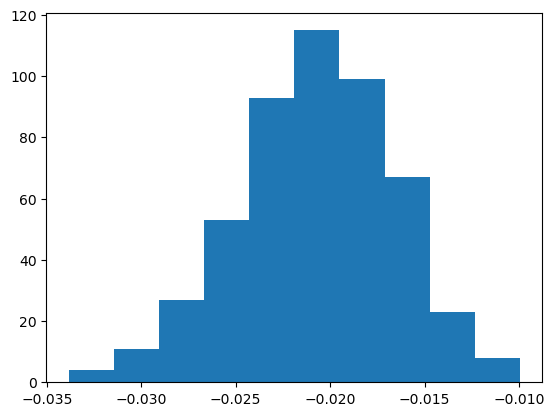

In [76]:
for i in range(len(bparams[0,:])):
    pd = bparams[:,i]
    std_param = np.std(pd) 
    mean_param = np.mean(pd)  # it's actually more accurate to
                             # just use the single fits, but we don't 
                             # necessarily know the name of that results structure
                             # when we are at this point in the code, use the mean for now
    print(f"Parma {i} = {mean_param} +/- {std_param}")
    plt.hist(pd)
    plt.show()

Note that the standard deviations of the parameters are lower with the maximum likelihood approximation.

B: 
weighted: 1.33 +/- 0.65
ML: 2.54 +/- 0.44

$\alpha_1$: 
weighted: 0.357 +/- 0.127
ML: 0.223 +/- 0.025

$\alpha_2$: 
weighted: -0.0317 +/- 0.0102
ML:  -0.0205 +/- 0.0041

Note that it is OK that the uncertainties are not within each other, since this is a highly correlated problem, so there are multiple solutions - small change in optimization can lead to large changes in the parameters while still being relatively close. 

In [77]:
def osmotic_pressure(cs,params, nu=2):
    # takes in a concentration, model parameters and nu. 
    term1 = cs
    term2 = params[1]*0.5*cs**2
    term3 = params[2]*(1/3.0)*cs**3
    csh = np.sqrt(cs)
    B = params[0]
    Bf = 1+B*csh
    term4 = (A/B**2)*((2/B)*np.log(Bf) - (2*csh+B*cs)/Bf)    
    p = nu*R*T*(term1+term2+term3+term4)
    ip = nu*R*T*cs  # this should be the ideal osmotic pressure
    return p,p/ip

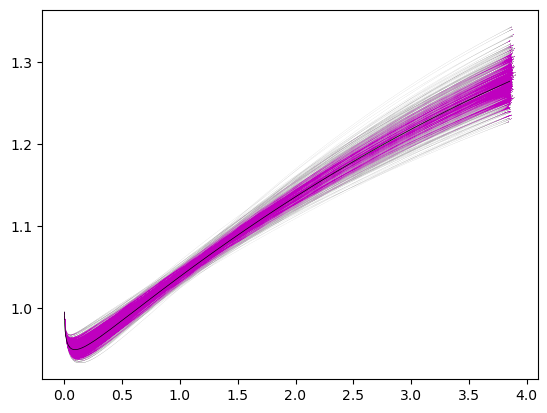

In [78]:
# scatter plots of the osmotic coefficients and osmotic pressures
ops = list()
ocs = list()
for p,c in zip(bparams,bcs):
    op,oc = osmotic_pressure(c,p)
    plt.scatter(c,oc,s=0.1,lw=0.1,alpha=0.01,c='m')
    ops.append(op)
    ocs.append(oc)
opt_oc = osmotic_pressure(c_opt_sparse,full_opt)[1]
plt.plot(c_opt_sparse,opt_oc,'k',lw=0.5,)
ops = np.array(ops)
ocs = np.array(ocs)
plt.show()

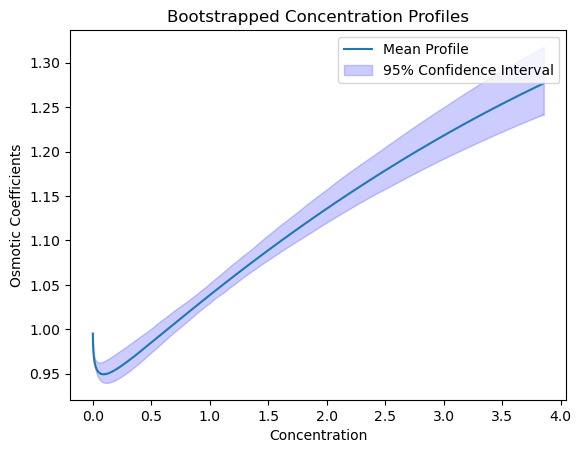

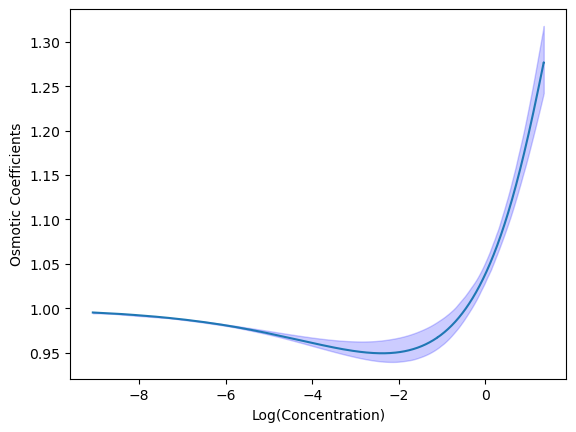

In [79]:
lower_bound = np.percentile(ocs, 2.5, axis=0)
upper_bound = np.percentile(ocs, 97.5, axis=0)
# Plotting the results
plt.plot(c_opt_sparse, opt_oc, label='Mean Profile')
plt.fill_between(c_opt_sparse, lower_bound, upper_bound, color='b', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Concentration')
plt.ylabel('Osmotic Coefficients')
plt.legend()
plt.title('Bootstrapped Concentration Profiles')
plt.show()
plt.plot(np.log(c_opt_sparse), opt_oc, label='Mean Profile')
plt.fill_between(np.log(c_opt_sparse), lower_bound, upper_bound, color='b', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Log(Concentration)')
plt.ylabel('Osmotic Coefficients')
plt.show()

How can I extract the osmotic values at each concentration?